In [164]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [202]:
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'k'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['xtick.color'] = 'k'
matplotlib.rcParams['ytick.color'] = 'k'
matplotlib.rcParams['axes.labelsize'] = 'large'

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mhy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import spacy

In [32]:
f_name = "Software_2018.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [33]:
print(all_data[-1].keys())
print(len(all_data))

dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])
459436


In [34]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [45]:
tmp = pd.DataFrame(all_data)
tmp["reviewTime"] = tmp["reviewTime"].str[-4:]
a = pd.to_datetime(tmp["reviewTime"])
tmp["reviewTime"] = a.dt.strftime('%Y')

In [49]:
year_data = tmp[["reviewTime",'overall', 'reviewText']]

In [100]:
tmp_year = year_data.groupby(['reviewTime'])
data_2014 = tmp_year.get_group("2014")
data_2018 = tmp_year.get_group("2018")
data_2017 = tmp_year.get_group("2017")
data_recent = pd.concat([data_2018, data_2017, data_2016])
data_2018, data_2014 = data_2018.head(12000), data_2014.head(12000)
print(len(data_2014))
print(len(data_2018))

12000
12000


In [101]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    #uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp = spacy.load("en_core_web_sm")

    review_text = []
    for idx, d in enumerate(all_data['reviewText']):
        if idx % 1000 == 0:
            print(idx)
        #print(d)
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d.translate(translator).lower()
        doc = nlp(r)
        r = [word.text for word in doc if word.text not in stop_words and not word.text.isdigit() and 
             word.pos_ in ("NOUN", "ADJ")]
        #review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                #uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            #uniCount[r[0]] += 1
    return bigramCount #, review_text

In [130]:
high_2014, low_2014 = data_2014.loc[(data_2014['overall'] == 5.0)], data_2014.loc[(data_2014['overall'] == 1.0) | (data_2014['overall'] == 2.0)]
print(len(high_2014), len(low_2014))

6433 2594


In [131]:
high_2018, low_2018 = data_2018.loc[(data_2018['overall'] == 5.0)], data_2018.loc[(data_2018['overall'] == 1.0)]
print(len(high_2018), len(low_2018))

6111 3150


In [132]:
high_bi_recent = only_adj_and_noun(high_2018)
low_bi_recent = only_adj_and_noun(low_2018)

0
1000
2000
3000
4000
5000
6000
0
1000
2000
3000


In [133]:
high_bi = only_adj_and_noun(high_2014)

0
1000
2000
3000
4000
5000
6000


In [134]:
low_bi = only_adj_and_noun(low_2014)

0
1000
2000


In [212]:
high_bi_2014 = Counter(high_bi)
high_bi_recent = Counter(high_bi_2018)


In [247]:
print(high_bi_2014.most_common(300))

[('great product', 190), ('microsoft office', 112), ('year old', 103), ('great price', 102), ('hard drive', 86), ('pc matic', 84), ('user friendly', 83), ('new computer', 77), ('good price', 72), ('good product', 70), ('great program', 63), ('ms office', 60), ('older version', 57), ('product key', 54), ('operating system', 54), ('excellent product', 51), ('old version', 51), ('customer service', 48), ('long time', 47), ('great software', 47), ('key card', 46), ('program easy', 45), ('many years', 45), ('new version', 43), ('worth money', 43), ('several years', 41), ('office mac', 41), ('learning curve', 40), ('product great', 39), ('windows windows', 39), ('home student', 37), ('great value', 36), ('tech support', 36), ('address book', 36), ('great deal', 35), ('snow leopard', 35), ('old computer', 34), ('windows vista', 34), ('version office', 32), ('easy great', 31), ('first time', 31), ('software easy', 31), ('macbook pro', 31), ('brand new', 30), ('microsoft word', 29), ('product e

In [240]:
print(high_bi_recent.most_common(250))

[('great product', 788), ('great price', 314), ('good product', 292), ('good price', 206), ('product key', 177), ('excellent product', 170), ('many years', 166), ('great software', 157), ('great program', 156), ('norton security', 155), ('microsoft office', 153), ('hard drive', 142), ('customer service', 142), ('user friendly', 138), ('product great', 134), ('kindle pc', 127), ('great app', 125), ('norton years', 125), ('new computer', 110), ('several years', 110), ('internet security', 106), ('amazon music', 104), ('great deal', 98), ('year old', 96), ('operating system', 93), ('long time', 88), ('product easy', 87), ('kindle app', 86), ('learning curve', 80), ('easy great', 79), ('product good', 78), ('great value', 78), ('program easy', 76), ('windows windows', 76), ('ms office', 73), ('kindle books', 73), ('easy install', 72), ('software great', 71), ('security software', 70), ('worth money', 70), ('first time', 70), ('fast shipping', 68), ('software easy', 64), ('new version', 63)

In [251]:
selected = ['mavis beacon', 'price reasonable', 'antivirus software','user friendly', 'customer service', 'windows vista']
#high_bi_recent['kindle books'] = 23 
selected.sort(key=lambda x: high_bi_recent[x])
x, y = selected, [high_bi_recent[i] for i in selected]
high_bi_2014['kindle books'] = 23
x_2014, y_2014 = selected, [high_bi_2014[i] for i in selected]

In [252]:
total_18, total_14 = sum(high_bi_recent.values()), sum(high_bi_2014.values())
y_scaled = [i / total_18 for i in y]
y_2014_scaled = [i / total_14 for i in y_2014]

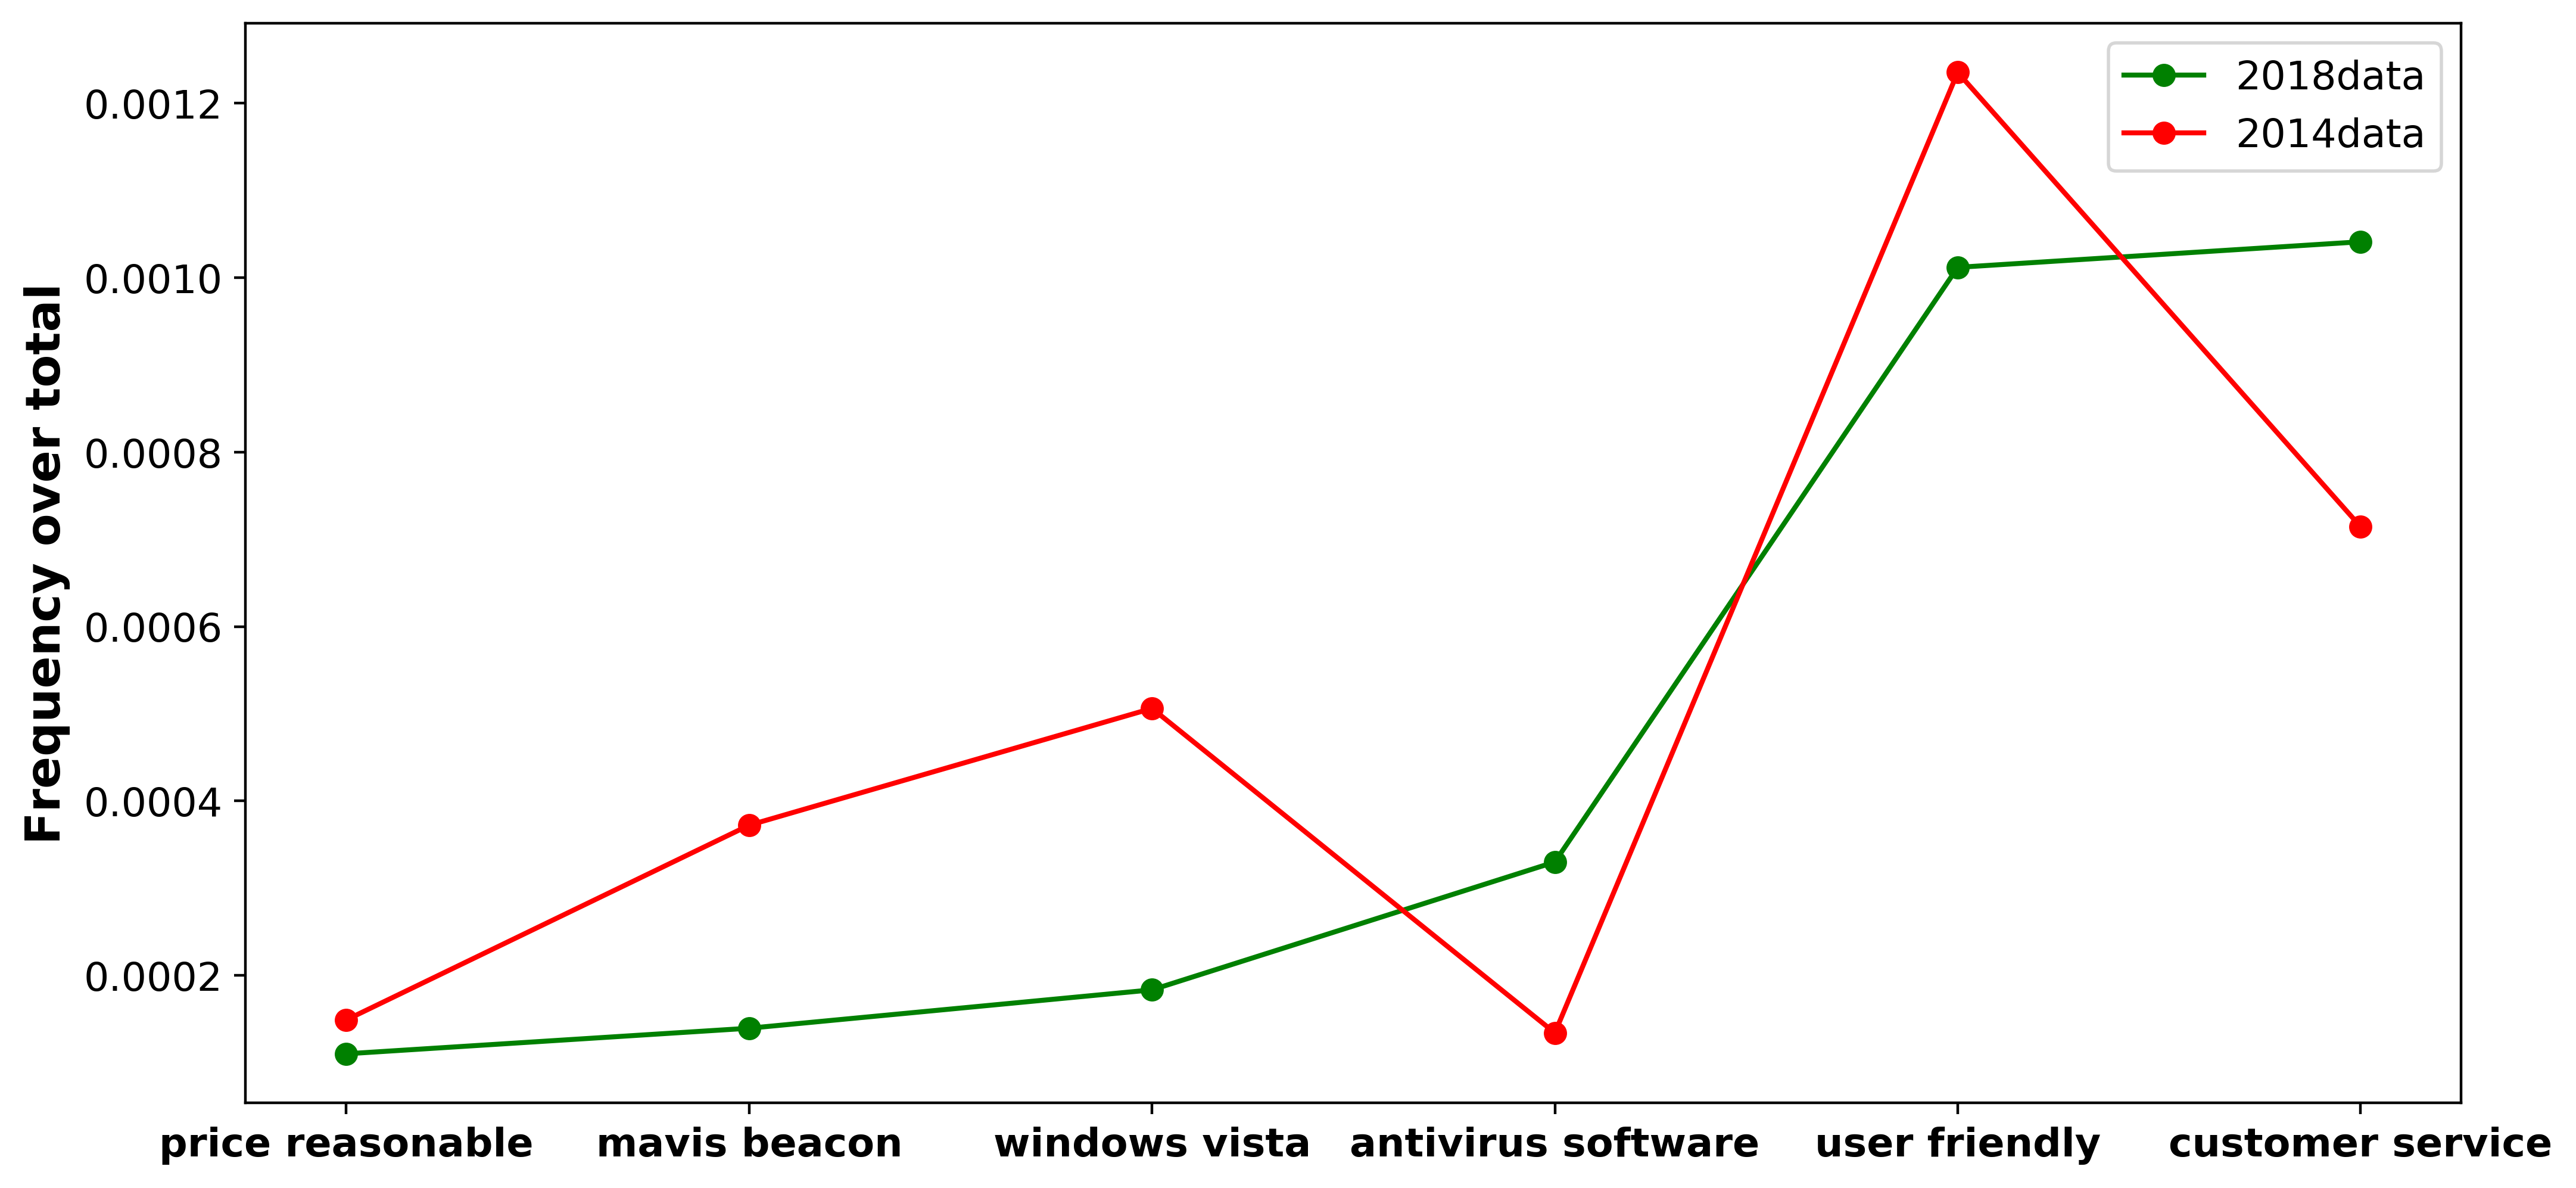

In [253]:
fig,ax=plt.subplots(figsize=(12, 6))
#fig = plt.figure(figsize=(12, 6))
# fig.patch.set_alpha(0);
# ax = fig.add_subplot(111)
# ax.patch.set_alpha(0);

ax.plot(x,y_scaled,'g-o',x_2014,y_2014_scaled,'r-o')
ax.legend(('2018data','2014data'),loc='best')
#plt.title('Frequency differnt of Top 6 important words of high rating',weight="bold", color="white")
plt.ylabel('Frequency over total', weight="bold")

plt.xticks(weight = 'bold')
plt.show()

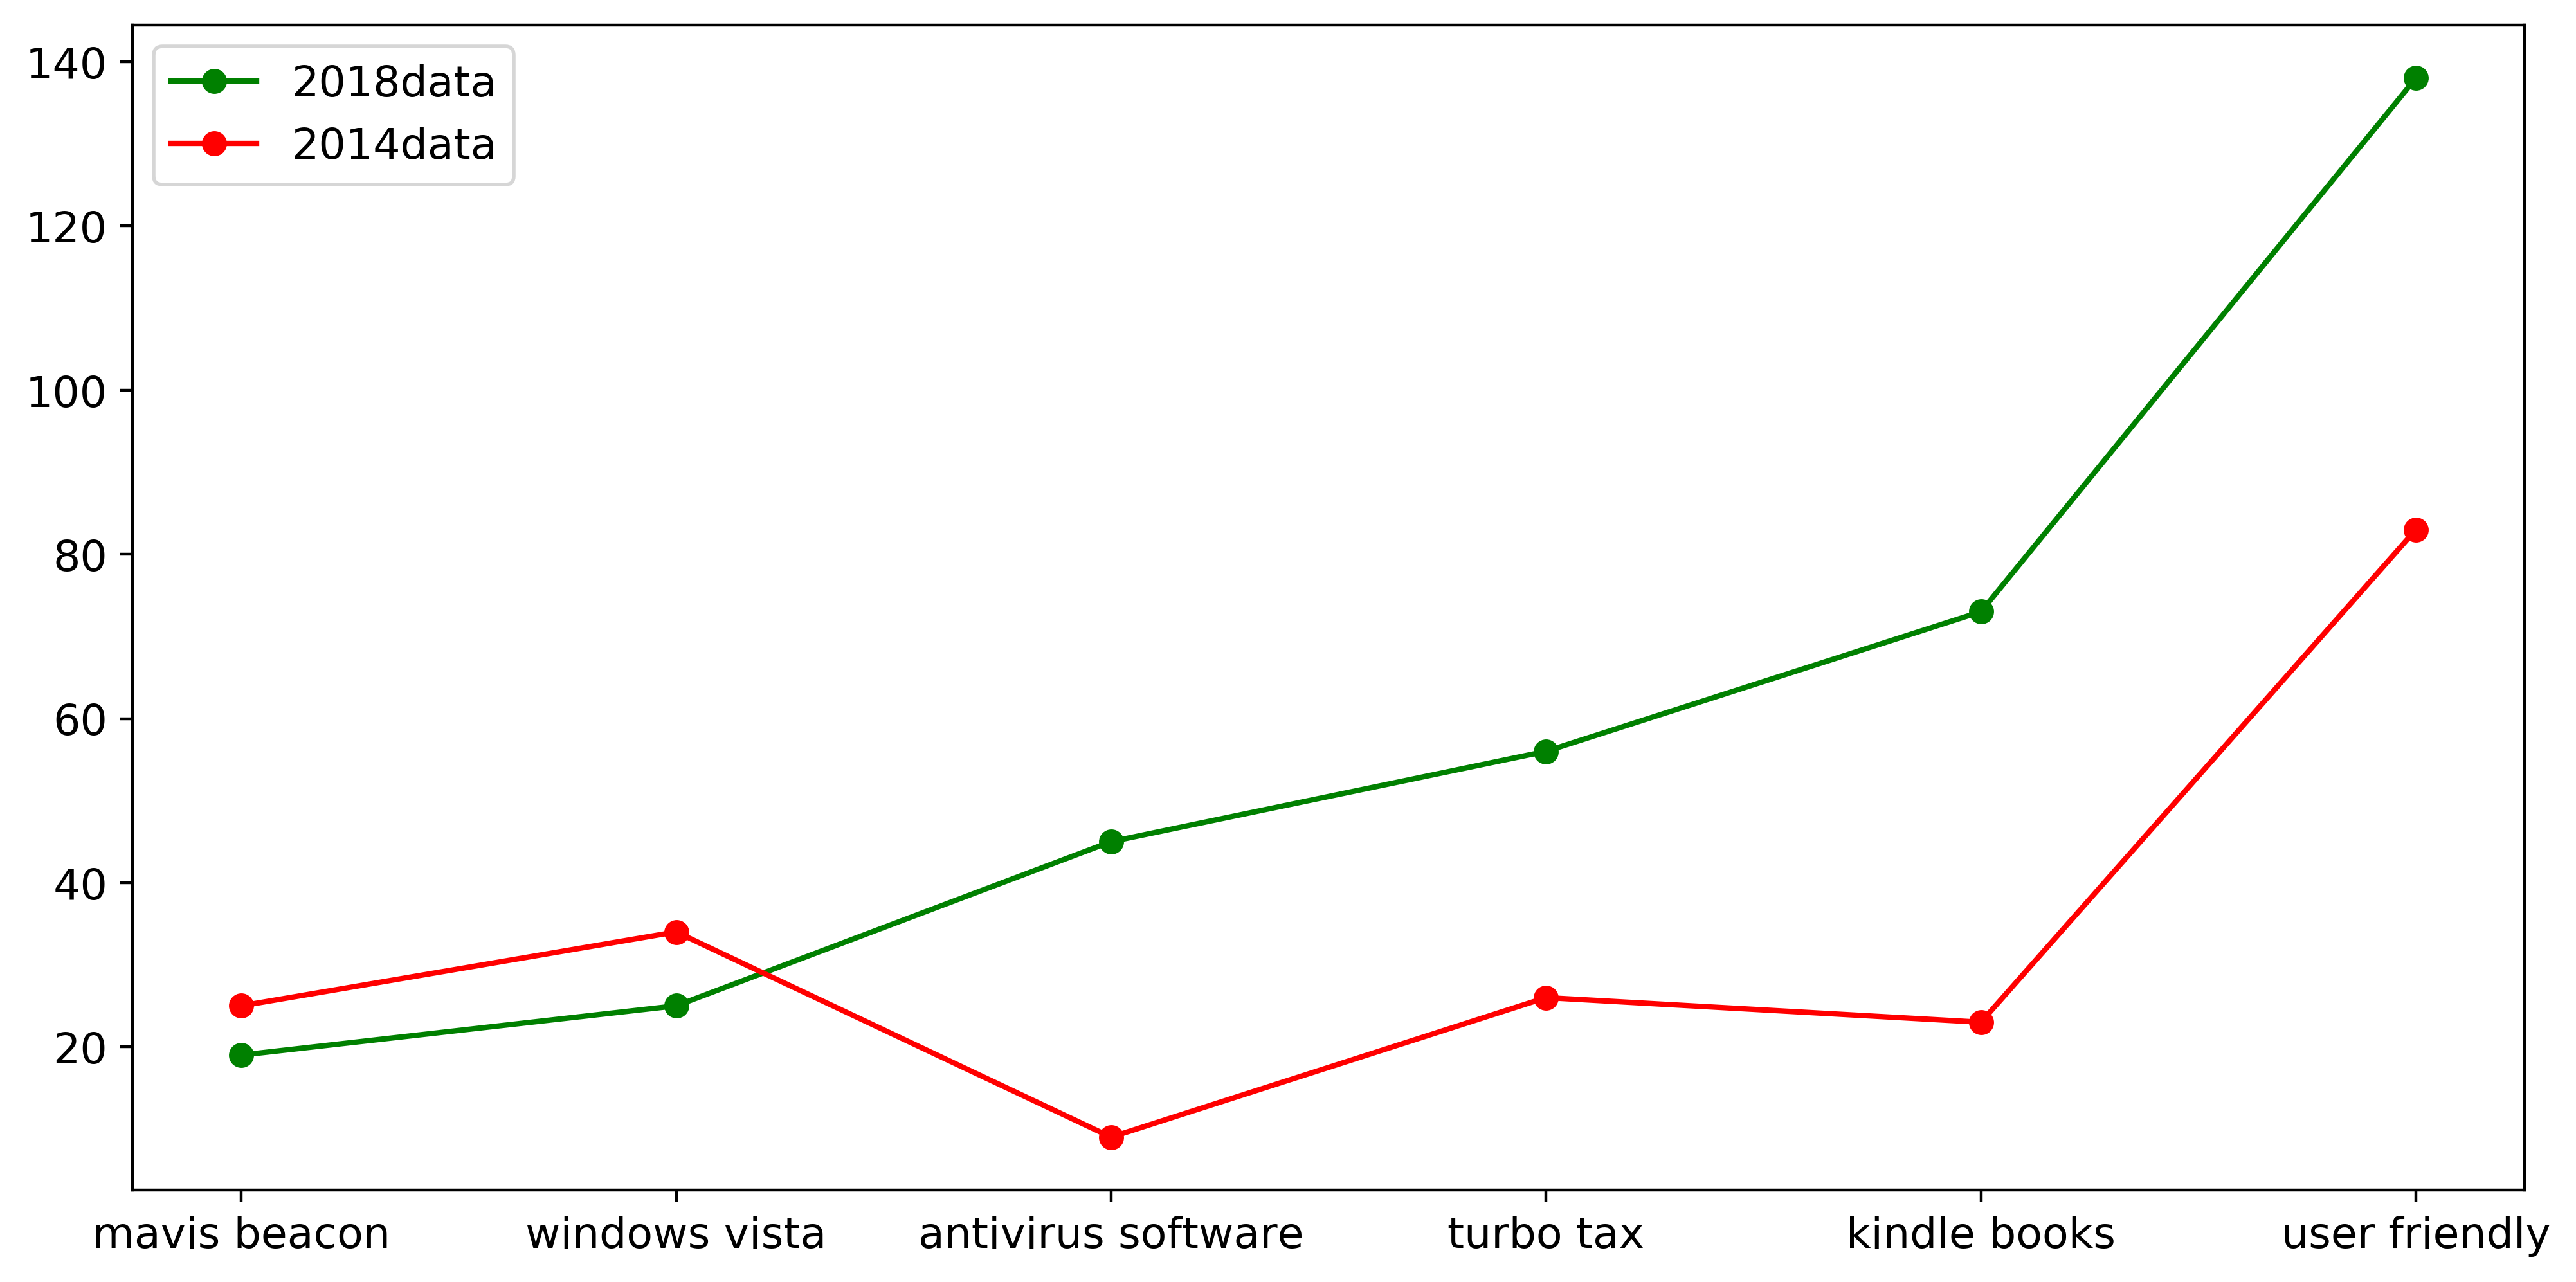

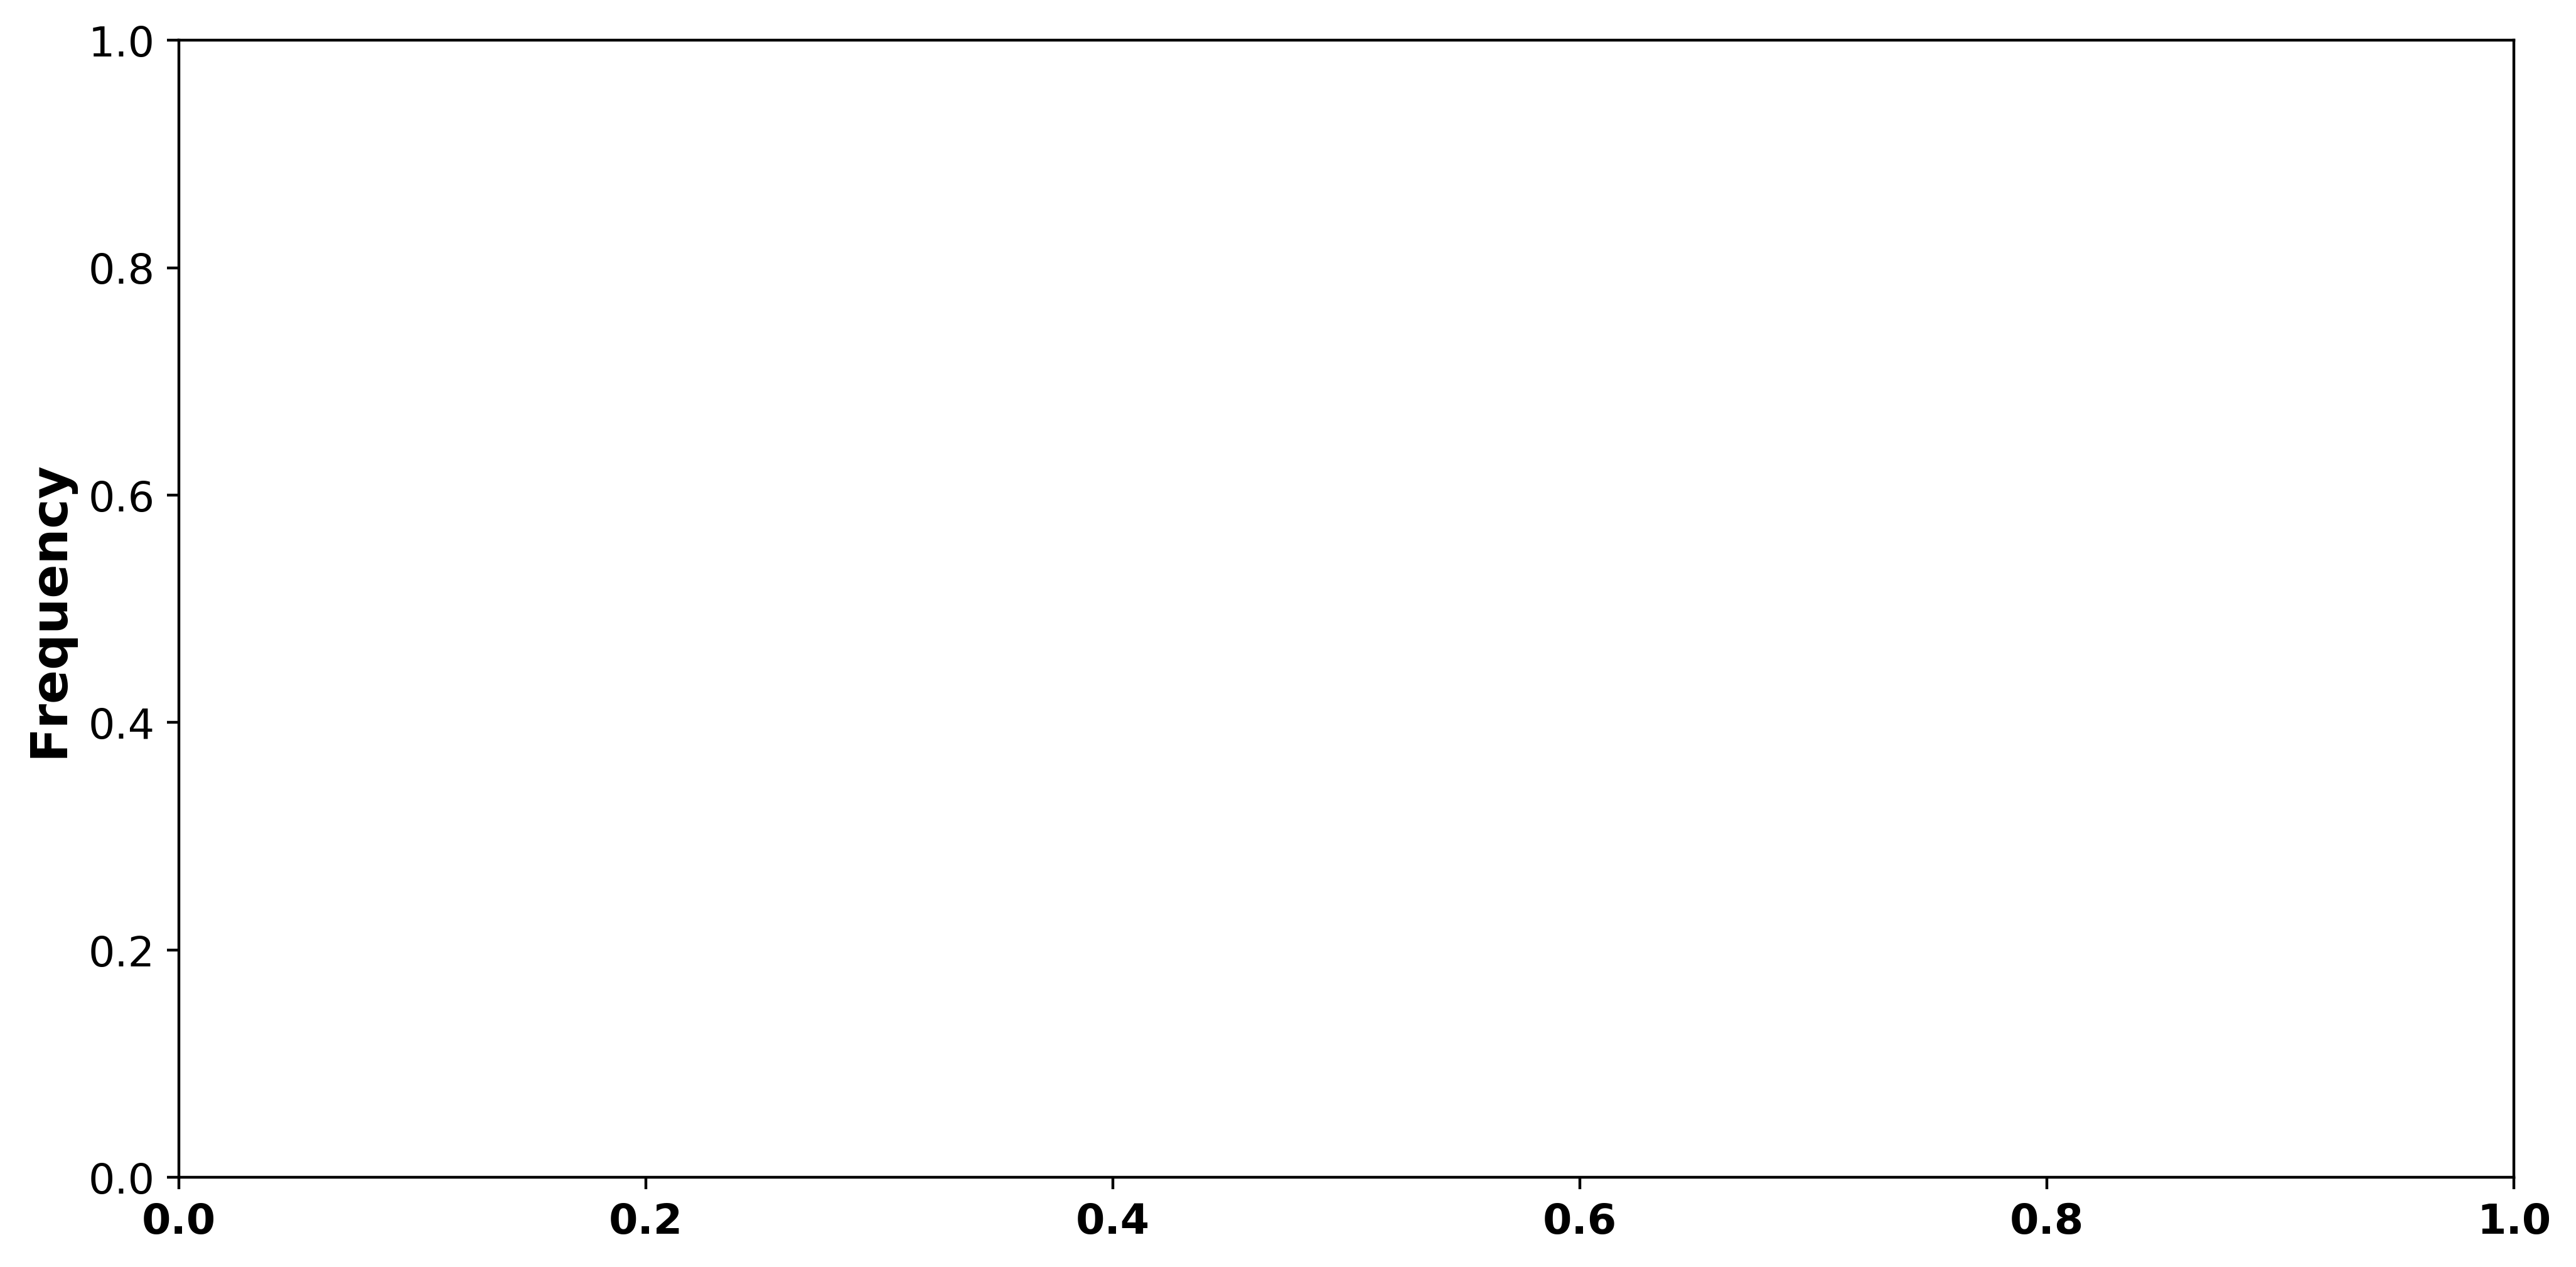

In [216]:
fig,ax=plt.subplots(figsize=(12, 6))
fig = plt.figure(figsize=(12, 6))
# fig.patch.set_alpha(0);
# ax = fig.add_subplot(111)
# ax.patch.set_alpha(0);

ax.plot(x,y,'g-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
#plt.title('Frequency differnt of Top 6 important words of high rating',weight="bold", color="white")
plt.ylabel('Frequency', weight="bold")
plt.xticks(weight = 'bold')
plt.show()

In [148]:
low_bi_2014 = Counter(low_bi)
low_bi_recent = Counter(low_bi_2018)

In [149]:
print(low_bi_2014.most_common(100))

[('tech support', 101), ('waste money', 91), ('customer service', 89), ('product key', 56), ('hard drive', 51), ('customer support', 47), ('user friendly', 46), ('time money', 44), ('quicken essentials', 42), ('new computer', 41), ('mac version', 40), ('error message', 39), ('older version', 37), ('operating system', 36), ('technical support', 33), ('new version', 31), ('old version', 30), ('first time', 30), ('quicken mac', 30), ('waste time', 30), ('pc matic', 30), ('credit card', 29), ('several times', 28), ('essentials mac', 27), ('microsoft office', 25), ('quicken windows', 25), ('serial number', 25), ('year old', 24), ('program computer', 24), ('many years', 23), ('rosetta stone', 22), ('windows windows', 22), ('windows version', 22), ('version quicken', 22), ('pc version', 22), ('office mac', 21), ('version windows', 21), ('many times', 20), ('version version', 20), ('computer software', 20), ('good luck', 20), ('windows computer', 19), ('operating systems', 19), ('web site', 19

In [150]:
print(low_bi_recent.most_common(100))

[('product key', 484), ('customer service', 321), ('waste money', 310), ('tech support', 302), ('customer support', 170), ('new computer', 126), ('waste time', 125), ('time money', 118), ('amazon music', 117), ('several times', 108), ('operating system', 103), ('error message', 100), ('hard drive', 100), ('serial number', 100), ('key code', 99), ('user friendly', 96), ('microsoft office', 95), ('windows windows', 84), ('print shop', 79), ('activation code', 72), ('old version', 70), ('total waste', 70), ('new version', 70), ('phone number', 68), ('brand new', 68), ('first time', 66), ('credit card', 66), ('version windows', 66), ('kindle pc', 63), ('software computer', 60), ('windows computer', 60), ('product product', 60), ('buyer beware', 59), ('technical support', 57), ('computer computer', 56), ('norton security', 56), ('product amazon', 54), ('windows pro', 54), ('compatible windows', 54), ('product code', 53), ('software software', 53), ('long time', 52), ('multiple times', 52), 

In [166]:
selected_list = ['tech support', 'microsoft product', 'amazon music']
x, y = selected_list, [low_bi_recent[i] for i in selected_list]
x_2014, y_2014 = selected_list, [low_bi_2014[i] for i in selected_list]

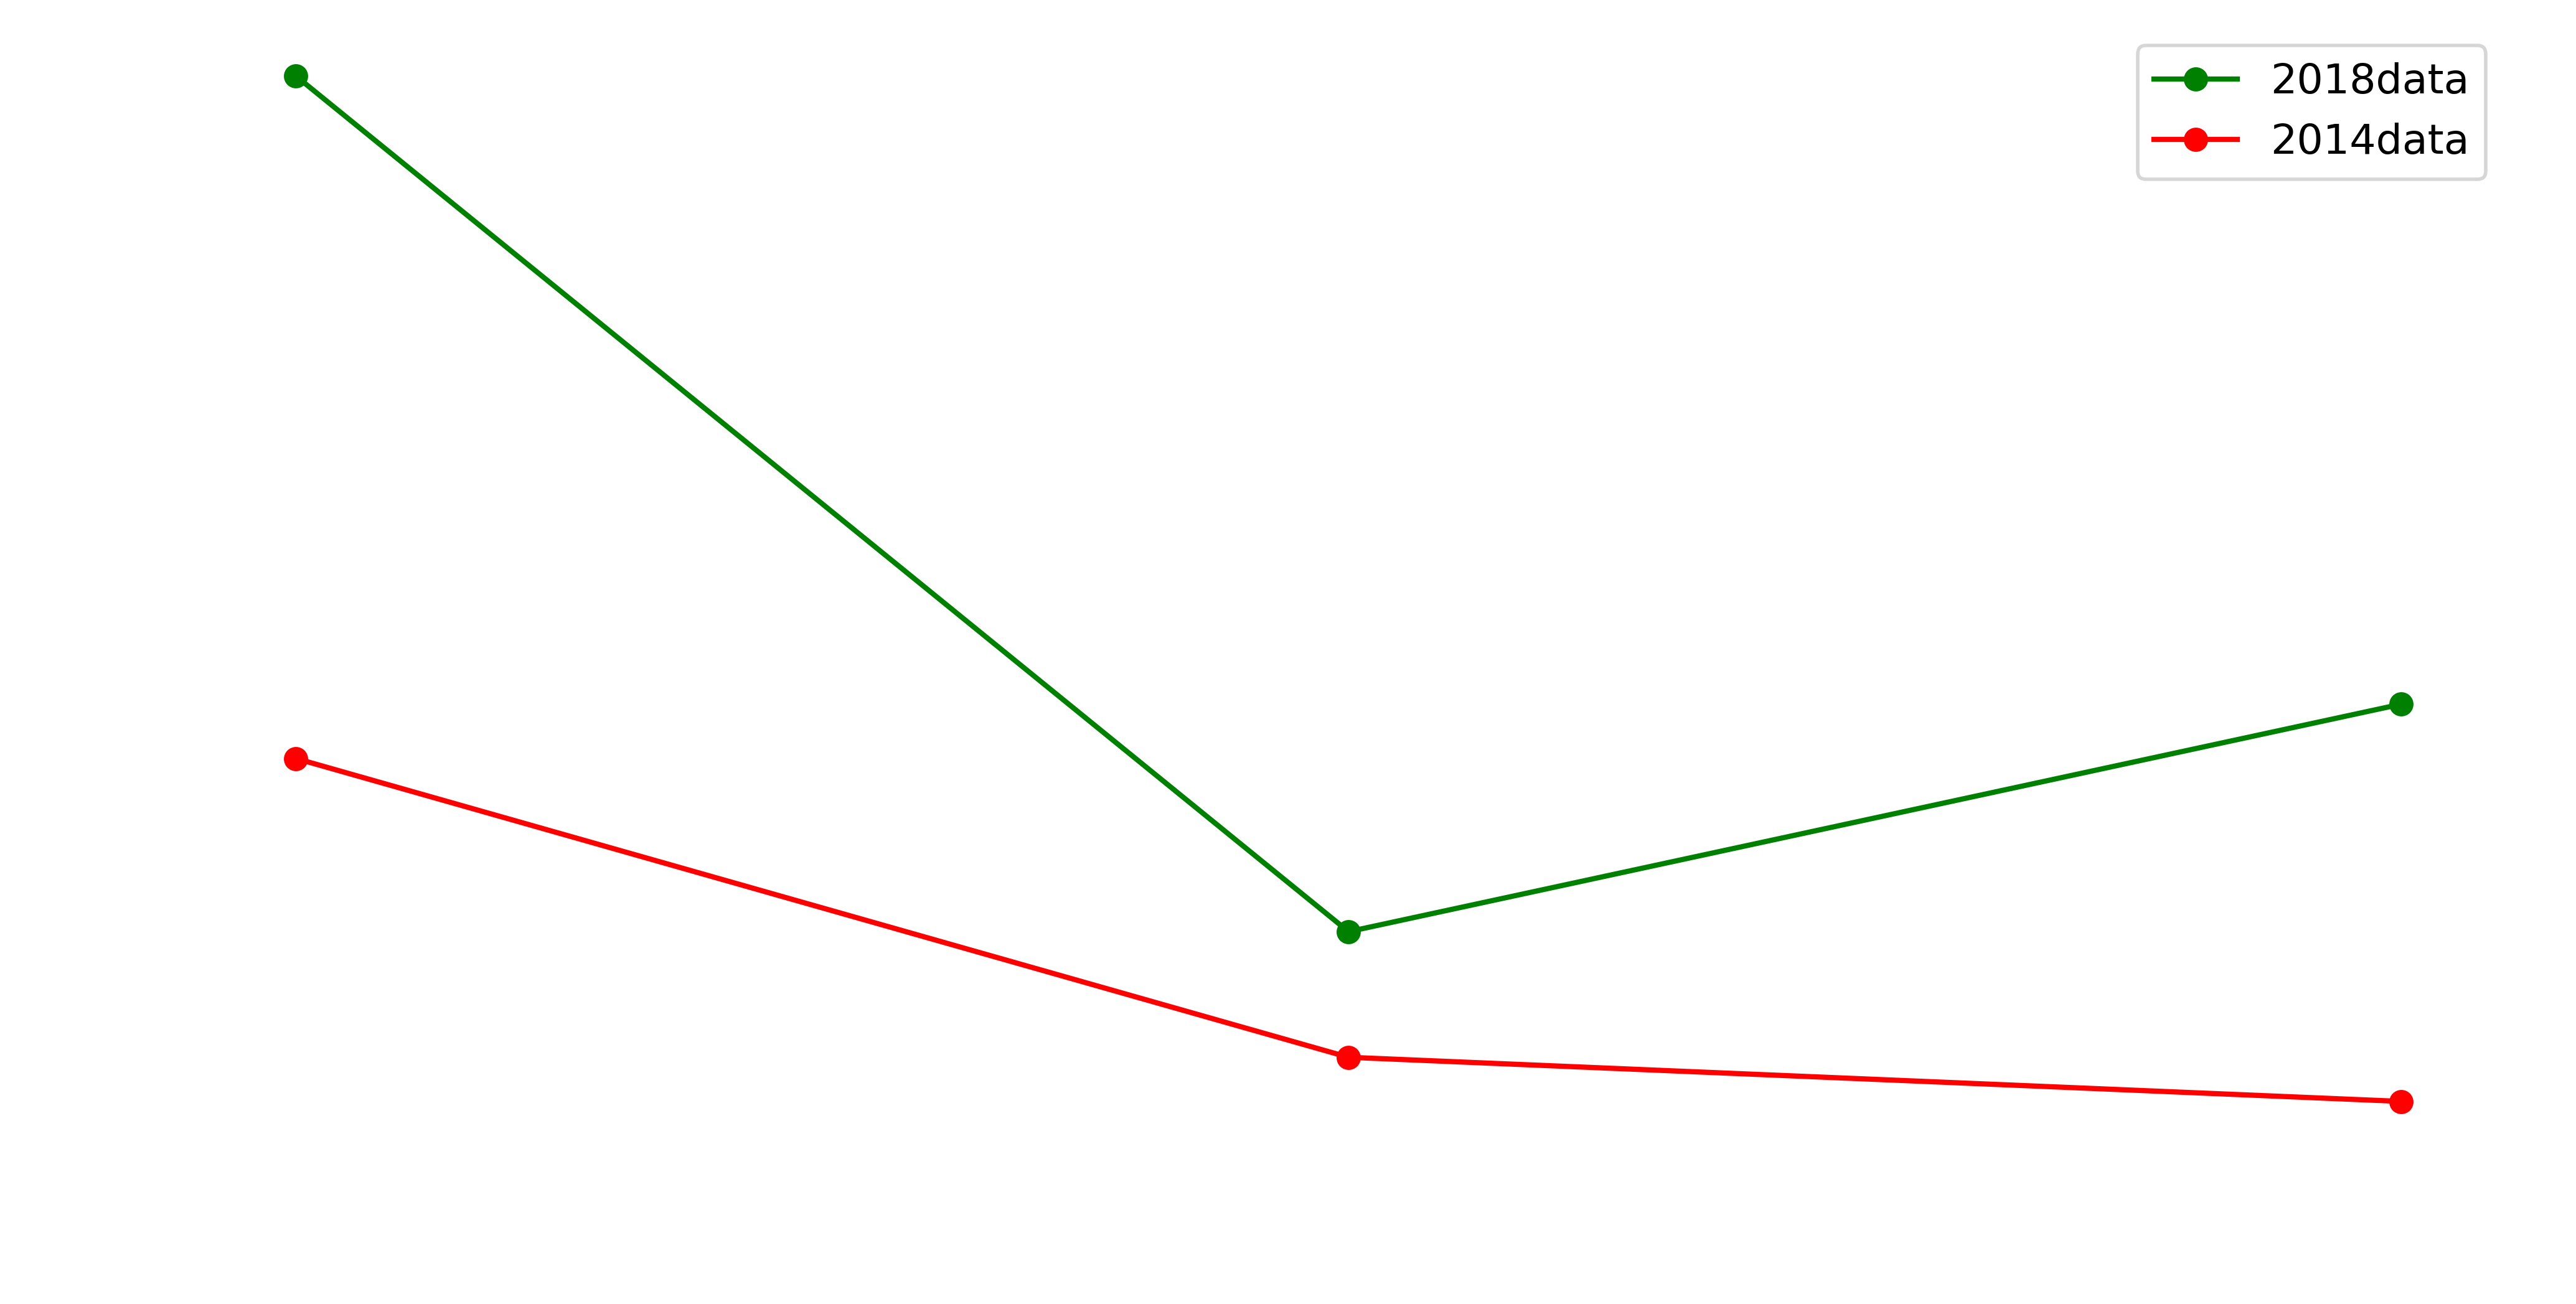

In [167]:
fig,ax=plt.subplots(figsize=(12, 6))
ax.plot(x,y,'g-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.xlabel('Frequency differnt of Top 6 important words of high rating')
plt.ylabel('Frequency')
plt.show()